In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, expon, rankdata



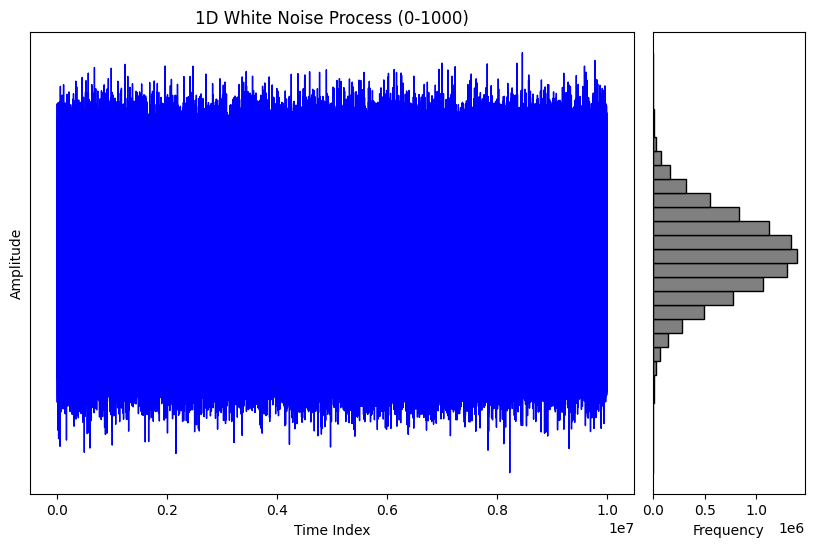

In [38]:
# Generate white noise process
np.random.seed(0)  # for reproducibility
n_samples = 1000
white_noise = np.random.normal(loc=0.0, scale=1.0, size=n_samples)

# Create figure and subplots
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1], wspace=0.05)

# Time series plot
ax_time = fig.add_subplot(gs[0])
ax_time.plot(white_noise, color='blue', linewidth=1)
ax_time.set_title('1D White Noise Process (0-1000)')
ax_time.set_xlabel('Time Index')
ax_time.set_ylabel('Amplitude')

# Histogram projected on the Y-axis (right side)
ax_hist = fig.add_subplot(gs[1], sharey=ax_time)
ax_hist.hist(white_noise, bins=30, orientation='horizontal', color='gray', edgecolor='black')
ax_hist.set_xlabel('Frequency')
ax_hist.tick_params(labelleft=False)  # hide y-ticks
ax_hist.set_yticks([])  # remove y-tick lines
ax_hist.grid(False)

plt.show()


In [74]:
def generate_correlated_data(n=5000, rho=0.0):
    """
    Generates two variables X and Y with a specified Pearson correlation coefficient.
    X ~ Normal(0,1), Y ~ Exponential(1), with approximately rho correlation.

    Args:
        n (int): Number of samples
        rho (float): Desired Pearson correlation (-1 to 1)

    Returns:
        tuple: (X, Y)
    """
    np.random.seed(42)

    # Step 1: Generate bivariate normal data with correlation rho
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    z = np.random.multivariate_normal(mean, cov, size=n)

    # Step 2: Convert to uniform using normal CDF
    u = norm.cdf(z[:, 0])
    v = norm.cdf(z[:, 1])

    # Step 3: Apply inverse transforms to get desired marginals
    X = norm.ppf(u)         # Normal(0,1)
    Y = expon.ppf(v)        # Exponential(1)

    return X, Y



In [81]:
def plot_joint_with_marginals(X, Y, title="Joint Distribution with Marginals"):
    fig = plt.figure(figsize=(8, 8))
    gs = fig.add_gridspec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1], wspace=0.05, hspace=0.05)

    # Joint plot (top-left)
    ax_joint = fig.add_subplot(gs[0, 0])
    ax_joint.scatter(X, Y, alpha=0.6)
    ax_joint.set_xlabel("X")
    ax_joint.set_ylabel("Y")
    ax_joint.set_title(title)
    ax_joint.grid(True)

    # Y marginal (top-right)
    ax_y_hist = fig.add_subplot(gs[0, 1], sharey=ax_joint)
    ax_y_hist.hist(Y, bins=30, orientation='horizontal', color='gray', edgecolor='black')
    ax_y_hist.tick_params(left=False, labelleft=False)
    ax_y_hist.set_xlabel("Freq")
    ax_y_hist.set_yticks([])
    ax_y_hist.grid(False)

    # X marginal (bottom-left), flipped to point downward
    ax_x_hist = fig.add_subplot(gs[1, 0], sharex=ax_joint)
    ax_x_hist.invert_yaxis()  # Flip the histogram down
    ax_x_hist.hist(X, bins=30, orientation='vertical', color='gray', edgecolor='black')
    ax_x_hist.tick_params(bottom=False, labelbottom=False)
    ax_x_hist.set_ylabel("Freq")
    ax_x_hist.set_xticks([])
    ax_x_hist.grid(False)

    # Bottom-right left empty
    fig.add_subplot(gs[1, 1]).axis("off")

    plt.show()


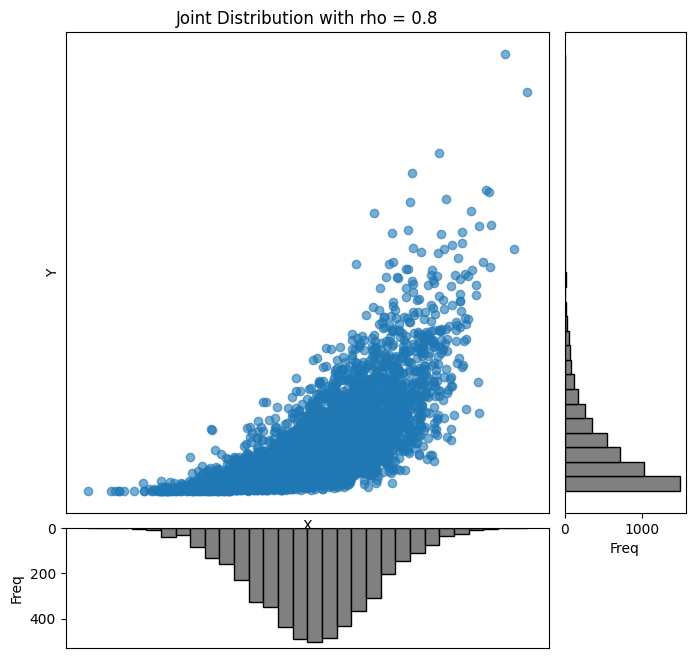

In [84]:
# Choose correlation here
rho = 0.8  # Set between -1 and 1

# Generate data with desired correlation
X, Y = generate_correlated_data(n=5000, rho=rho)

# Plot joint distribution
plot_joint_with_marginals(X, Y, f"Joint Distribution with rho = {rho}")


In [85]:
def calculate_and_print_correlation(X, Y):
    pearson_corr = np.corrcoef(X, Y)[0, 1]
    spearman_corr = np.corrcoef(rankdata(X), rankdata(Y))[0, 1]
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")



In [86]:
# Print correlation stats
calculate_and_print_correlation(X, Y)

Pearson Correlation: 0.717
Spearman Correlation: 0.783


In [92]:
def plot_transformed_data(X_u, Y_u, title="Transformed Data (Uniform Margins)"):
    plt.figure(figsize=(6, 6))
    plt.scatter(X_u, Y_u, alpha=0.6)
    plt.xlabel("U = F_X(X)")
    plt.ylabel("V = F_Y(Y)")
    plt.title(title)
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()




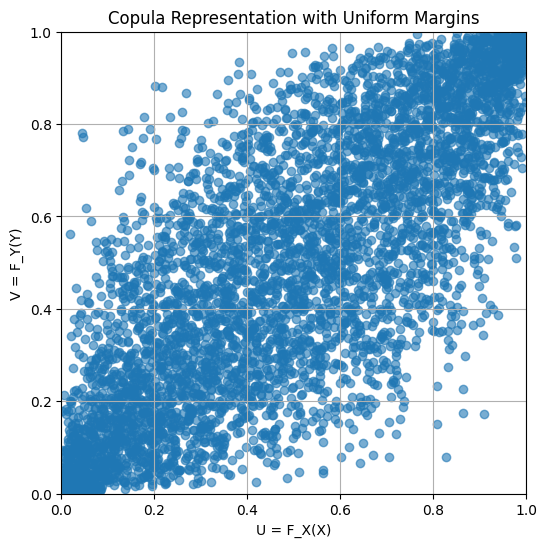

In [93]:
# Transform to uniform margins (empirical copula representation)
X_u = rankdata(X) / (len(X) + 1)
Y_u = rankdata(Y) / (len(Y) + 1)

# Plot copula representation
plot_transformed_data(X_u, Y_u, "Copula Representation with Uniform Margins")
